In [1]:
# Fig 6d-e, Fig S7

# MUST be used with lower version of scipy(1.13.1) and numpy (1.26.4). later versions have odd numpy structure
# that conflict with how this data was saved.

import numpy as np
import matplotlib.pyplot as plt

import os
import sys
import pickle
import copy
from scipy.io import savemat
from scipy.linalg import schur
from sklearn.cluster import DBSCAN as dbscan
#from dynamics.process.rnn.parse import KEconvert2matlab
from scipy.stats import ranksums, wilcoxon,ks_2samp
import glob
import warnings
from sklearn.metrics import pairwise_distances
from os.path import exists
from scipy import interpolate
from copy import deepcopy
import scipy

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

import json



sys.path.insert(0, '/Users/dhocker/projects/kind_cl/')

from dynamics.process.rnn import wt_kindergarten, wt_nets, wt_costs, wt_reinforce_cont_new, wt_pred, parse, parse_state
%load_ext autoreload
%autoreload 2

warnings.filterwarnings("ignore", message="Trying to unpickle estimator PCA*")


In [2]:
# cluster
#dbase = '/scratch/dh148/dynamics/results/rnn/ac/20231003/figs/'

#local
dbase = '/Users/dhocker/projects/kind_cl/data/processed4plots/'

reg_idx = 0

if reg_idx == 0:
    fname = 'ke_results_ofc_wait_all3.dat'  # inference layer (OFC) results
elif reg_idx == 1:
    fname = 'ke_results_str_wait_all3.dat'  # policy layer (STR) results


with open(dbase+fname,'rb') as f:
    savedict = pickle.load(f)
    npts_kind_wait = savedict['npts_kind_wait']
    npts_kind_iti = savedict['npts_kind_iti']
    npts_kind_start = savedict['npts_kind_start']
    npts_classic_wait = savedict['npts_classic_wait']
    npts_classic_iti = savedict['npts_classic_iti']
    npts_classic_start = savedict['npts_classic_start']
    npts_mem_wait = savedict['npts_mem_wait']
    npts_mem_iti = savedict['npts_mem_iti']
    npts_mem_start = savedict['npts_mem_start']



In [3]:
#print out number of points for use in R for discrete KS test
print(npts_kind_wait[2])

print(npts_classic_wait[2])

print(npts_mem_wait[2])

bins = np.linspace(0,20,21)

cumul_full = np.cumsum(np.histogram(npts_kind_wait[2],density=True,bins = bins)[0])
cumul_shp = np.cumsum(np.histogram(npts_classic_wait[2],density=True, bins = bins)[0])
cumul_mem = np.cumsum(np.histogram(npts_mem_wait[2],density=True, bins = bins)[0])

#discrete test statistic was 0.4 find that val
print('full vs shaping')
print(np.abs(cumul_full-cumul_shp))

print("full vs. mem")
#test statistic was 0.4 find that val
print(np.abs(cumul_full-cumul_mem))


[4, 2, 4, 3, 6, 3, 2, 6, 3, 3, 5, 5, 3, 4, 1, 14, 1, 3, 2, 3, 1, 4, 1, 5, 2, 0, 0, 4, 2, 1, 0, 6, 6, 3, 2, 4, 3, 1, 5, 6, 3, 1, 19, 2, 1]
[4, 2, 2, 1, 1, 1, 3, 2, 1, 2, 1, 1, 2, 1, 3, 2, 1, 2, 2, 2, 2, 3, 1, 1, 2, 1, 4, 2, 1, 3, 1, 2, 2, 4, 2, 1, 2, 1, 1, 1, 1, 5, 2, 1, 1]
[1, 1, 2, 3, 2, 1, 1, 2, 2, 1, 2, 1, 2, 1, 1, 3, 2, 2, 2, 2]
full vs shaping
[0.06666667 0.2        0.42222222 0.28888889 0.22222222 0.15555556
 0.04444444 0.04444444 0.04444444 0.04444444 0.04444444 0.04444444
 0.04444444 0.04444444 0.02222222 0.02222222 0.02222222 0.02222222
 0.02222222 0.        ]
full vs. mem
[0.06666667 0.15555556 0.5        0.37777778 0.24444444 0.15555556
 0.04444444 0.04444444 0.04444444 0.04444444 0.04444444 0.04444444
 0.04444444 0.04444444 0.02222222 0.02222222 0.02222222 0.02222222
 0.02222222 0.        ]


In [20]:
# do the same for dimensionality

#print out number of points for use in R
print(npts_kind_wait[-2])

print(npts_classic_wait[-2])

print(npts_mem_wait[-2])

bins = np.linspace(0,4,5)

cumul_full = np.cumsum(np.histogram(npts_kind_wait[-2],density=True,bins = bins)[0])
cumul_shp = np.cumsum(np.histogram(npts_classic_wait[-2],density=True, bins = bins)[0])
cumul_mem = np.cumsum(np.histogram(npts_mem_wait[-2],density=True, bins = bins)[0])

#test statistic was  find that val
print('full vs shaping')
print(np.abs(cumul_full-cumul_shp))

print("full vs. mem")
#test statistic was  find that val
print(np.abs(cumul_full-cumul_mem))

[3, 2, 3, 3, 2, 2, 2, 4, 3, 2, 3, 3, 2, 3, 2, 3, 1, 2, 2, 2, 1, 3, 2, 2, 3, 1, 2, 3, 1, 1, 2, 3, 2, 3, 3, 2, 3, 1, 3, 3, 3, 1, 2, 1, 1]
[2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 3, 1, 1, 2, 2, 2, 2, 3, 1, 2, 3, 3, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 3, 1, 1, 2, 2, 2, 1]
[2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 1, 2]
full vs shaping
[0.         0.17777778 0.31111111 0.        ]
full vs. mem
[0.         0.15       0.32222222 0.        ]


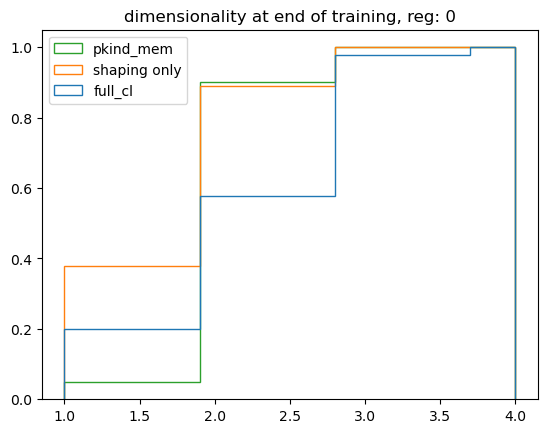

In [22]:
#try plotting dimensionality? Supp Fig 7a,b


plt.hist([npts_kind_wait[-2],npts_classic_wait[-2], npts_mem_wait[-2]],label=['full_cl','shaping only','pkind_mem'],
         cumulative=True,histtype='step', density=True)

#plt.hist(npts_classic_wait[-1],label='classic cl',width=0.8)
plt.legend()
plt.title('dimensionality at end of training, reg: '+str(reg_idx))
#plt.savefig(savedir+'dimen_reg_'+str(reg_idx)+'.pdf')
plt.show()

# continuous KS test. not fully correct, but a ballpark test
#ksres = ks_2samp(npts_kind_wait[-1], npts_classic_wait[-1])
#print(ksres)


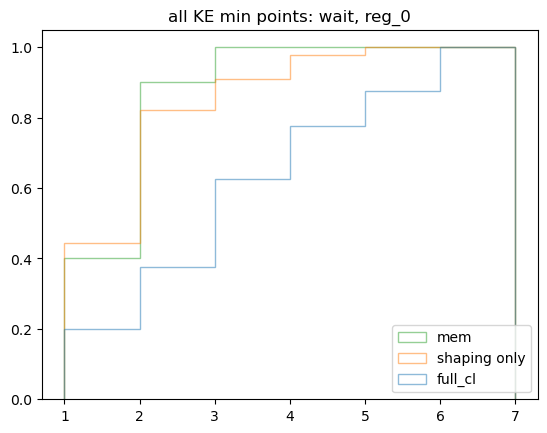

KstestResult(statistic=0.4222222222222222, pvalue=0.000559265196575265, statistic_location=2, statistic_sign=-1)
KstestResult(statistic=0.5, pvalue=0.0011237484384716923, statistic_location=2, statistic_sign=-1)


In [24]:
#Fig 6e


plt.hist([npts_kind_wait[2],npts_classic_wait[2],npts_mem_wait[2]],bins = [1,2,3,4,5,6,7],
         cumulative=True,histtype="step", alpha = 0.5,density=True, label=['full_cl','shaping only','mem'])

plt.legend(loc='lower right')
plt.title('all KE min points: wait, reg_'+str(reg_idx) )


#savename = savedir + 'numfeatures_reg'+str(reg_idx)
#plt.savefig(savename+'.pdf')
plt.show()

ksres = ks_2samp(npts_kind_wait[2], npts_classic_wait[2])
print(ksres)

ksres = ks_2samp(npts_kind_wait[2], npts_mem_wait[2])
print(ksres)



In [25]:
# load time-dependent data for full_cl
savename = dbase + 'ke_overtraining.dat'

with open(savename,'rb') as f:
    [npts_all,npts_all_str,dims_all, dims_all_str,tphase, tphase_str] = pickle.load(f)

In [26]:
#load time-dependent data for shaping-only CL
savename = dbase + 'ke_overtraining_shp.dat'

with open(savename,'rb') as f:
    [npts_all_shp,npts_all_shp_str,dims_all_shp, dims_all_shp_str,tphase_shp, tphase_shp_str] = pickle.load(f)

In [27]:
# load time-dependent data for memory-only CL
savename = dbase + 'ke_overtraining_mem.dat'

with open(savename,'rb') as f:
    [npts_all_mem,npts_all_mem_str,dims_all_mem, dims_all_mem_str, tphase_mem, tphase_mem_str] = pickle.load(f)

In [28]:
#  omit nans from tphase and npts
tphase_list = []
X_nonan = []
dims_nonan = []
for j in npts_all:
    tphase_cpy = copy.deepcopy(tphase)
    test = np.argwhere(~np.isnan(j))[:,0]
    
    x_j = list(np.array(j)[test])
    
    tphase_list.append(list(np.array(tphase_cpy)[test]))
    X_nonan.append(x_j)
    
for j in dims_all:
    test = np.argwhere(~np.isnan(j))[:,0]
    x_j = list(np.array(j)[test])
    dims_nonan.append(x_j)
    
    
tphase_list_str = []
X_nonan_str = []
dims_nonan_str = []
for j in npts_all_str:
    tphase_cpy = copy.deepcopy(tphase_str)
    test = np.argwhere(~np.isnan(j))[:,0]
    
    x_j = list(np.array(j)[test])
    
    tphase_list_str.append(list(np.array(tphase_cpy)[test]))
    X_nonan_str.append(x_j)
    
for j in dims_all_str:
    test = np.argwhere(~np.isnan(j))[:,0]
    x_j = list(np.array(j)[test])
    dims_nonan_str.append(x_j)
    
    
#number 44 didn't finish in striatum for some reason. pop it
_ = tphase_list_str.pop(44)
_ = X_nonan_str.pop(44)
_ = dims_nonan_str.pop(44)

In [29]:

# omit for nok_cl----------------------------
tphase_list_shp = []
X_nonan_shp = []
dims_nonan_shp = []
for j in npts_all_shp:
    tphase_cpy = copy.deepcopy(tphase_shp)
    test = np.argwhere(~np.isnan(j))[:,0]
    
    x_j = list(np.array(j)[test])
    
    tphase_list_shp.append(list(np.array(tphase_cpy)[test]))
    X_nonan_shp.append(x_j)
    
for j in dims_all_shp:
    test = np.argwhere(~np.isnan(j))[:,0] 
    x_j = list(np.array(j)[test])
    dims_nonan_shp.append(x_j)
    
    
tphase_list_shp_str = []
X_nonan_shp_str = []
dims_nonan_shp_str = []
for j in npts_all_shp_str:
    tphase_cpy = copy.deepcopy(tphase_shp_str)
    test = np.argwhere(~np.isnan(j))[:,0]
    
    x_j = list(np.array(j)[test])
    
    tphase_list_shp_str.append(list(np.array(tphase_cpy)[test]))
    X_nonan_shp_str.append(x_j)
    
for j in dims_all_shp_str:
    test = np.argwhere(~np.isnan(j))[:,0] 
    x_j = list(np.array(j)[test])
    dims_nonan_shp_str.append(x_j)


In [30]:
# omit for kind_mem
tphase_list_mem = []
X_nonan_mem = []
dims_nonan_mem = []
for j in npts_all_mem:
    tphase_cpy = copy.deepcopy(tphase_mem)
    test = np.argwhere(~np.isnan(j))[:,0]
    
    x_j = list(np.array(j)[test])
    X_nonan_mem.append(x_j)   
    tphase_list_mem.append(list(np.array(tphase_cpy)[test]))
    
# do same for dimensionality
for j in dims_all_mem:
    test = np.argwhere(~np.isnan(j))[:,0]   
    x_j = list(np.array(j)[test])
    dims_nonan_mem.append(x_j)   

    
tphase_list_mem_str = []
X_nonan_mem_str = []
dims_nonan_mem_str = []
for j in npts_all_mem_str:
    tphase_cpy = copy.deepcopy(tphase_mem_str)
    test = np.argwhere(~np.isnan(j))[:,0]
    
    x_j = list(np.array(j)[test])
    
    tphase_list_mem_str.append(list(np.array(tphase_cpy)[test]))
    X_nonan_mem_str.append(x_j)

for j in dims_all_mem_str:
    test = np.argwhere(~np.isnan(j))[:,0]   
    x_j = list(np.array(j)[test])
    dims_nonan_mem_str.append(x_j)  
    

In [31]:
#find the events on a network-by-network basis
events_idx = [list(np.argwhere(np.diff(k)>0)[:,0]) for k in tphase_list]
#add final event
#_ = [events_idx[k].append(len(tphase_list[k])-1) for k in range(len(tphase_list))]
_ = [events_idx[k].append(len(tphase_list[k])+1) for k in range(len(tphase_list))]

events_idx_str = [list(np.argwhere(np.diff(k)>0)[:,0]) for k in tphase_list_str]
#add final event
_ = [events_idx_str[k].append(len(tphase_list_str[k])+1) for k in range(len(tphase_list_str))]



In [32]:
# for nok_cl-------------------------
events_idx_shp = [[0] for k in range(len(tphase_list_shp))]
events_idx_shp_str = [[0] for k in range(len(tphase_list_shp))]

for k in range(len(tphase_list_shp)):
    events_idx_shp[k].extend(np.argwhere(np.diff(tphase_list_shp[k])>0)[:,0])
    
_ = [events_idx_shp[k].append(len(tphase_list_shp[k])+1) for k in range(len(tphase_list_shp))]


for k in range(len(tphase_list_shp_str)):
    events_idx_shp_str[k].extend(np.argwhere(np.diff(tphase_list_shp_str[k])>0)[:,0])

_ = [events_idx_shp_str[k].append(len(tphase_list_shp_str[k])+1) for k in range(len(tphase_list_shp_str))]

In [33]:
# for mem
events_idx_mem = [[0] for k in range(len(tphase_list_mem))]
events_idx_mem_str = [[0] for k in range(len(tphase_list_mem))]

for k in range(len(tphase_list_mem)):
    events_idx_mem[k].extend(np.argwhere(np.diff(tphase_list_mem[k])>0)[:,0])
    
_ = [events_idx_mem[k].append(len(tphase_list_mem[k])+1) for k in range(len(tphase_list_mem))]


for k in range(len(tphase_list_mem_str)):
    events_idx_mem_str[k].extend(np.argwhere(np.diff(tphase_list_mem_str[k])>0)[:,0])

_ = [events_idx_mem_str[k].append(len(tphase_list_mem_str[k])+1) for k in range(len(tphase_list_mem_str))]

In [34]:
def warp_new(X,ev_idx, medians = None):
    """ will warp to median timing of each event. events_idx must be matrix. X is variable length list"""
    
    Xcpy = copy.deepcopy(X)
    nevents = len(ev_idx[0])-1
    if medians is None:
        medians = []  
        print(nevents)
        for j in range(nevents+1):
            ev_j = [k[j] for k in ev_idx]
            medians.append(int(np.median(ev_j)))

            
    ntrials = len(ev_idx)
    ntwarped = medians[-1]
    tlen = list(np.diff(medians))
    medians = np.array(medians)


    Tratio = medians/ntwarped # proportion of warped trial that epoch should occupy
    twarp = [np.linspace(Tratio[k], Tratio[k+1], tlen[k]) for k in range(0, nevents)] 

    ind = 0
    Xwarped = []

    print('numbver of rnns')
    print(len(ev_idx))

    for k in range(ntrials):
        Xwarp_k = []
        for m in range(nevents):
            idx1 = ev_idx[k][m]
            idx2 = ev_idx[k][m + 1]

            d1 = Xcpy[k][idx1:idx2 + 1]

            if len(d1) > 1:
                tvec = np.linspace(Tratio[m], Tratio[m + 1], len(d1))
                f = interpolate.interp1d(tvec, d1, axis=0)
                d1_warped = f(twarp[m])
            else: #coincident events
                d1_warped = Xcpy[k,idx1]*np.ones(len(twarp[m]))            

            Xwarp_k.extend(d1_warped)

        Xwarped.append(Xwarp_k)


    return Xwarped,medians,twarp
    

In [35]:
#for full

npts_all_warped,Tmedians, twarp = warp_new(X_nonan, events_idx)
npts_all_warped_str,Tmedians_str, twarp_str = warp_new(X_nonan_str, events_idx_str, medians = Tmedians)
dims_all_warped,_, _ = warp_new(dims_nonan, events_idx)
dims_all_warped_str,_, _ = warp_new(dims_nonan_str, events_idx_str, medians = Tmedians)


# for nok_cl

npts_all_warped_shp,Tmedians_shp, twarp_shp = warp_new(X_nonan_shp, events_idx_shp)
npts_all_warped_shp_str,Tmedians_shp_str, twarp_shp_str = warp_new(X_nonan_shp_str, events_idx_shp_str, medians = Tmedians_shp)
dims_all_warped_shp,_, _ = warp_new(dims_nonan_shp, events_idx_shp)
dims_all_warped_shp_str,_, _ = warp_new(dims_nonan_shp_str, events_idx_shp_str, medians = Tmedians_shp)

# for mem
npts_all_warped_mem,Tmedians_mem, twarp_mem = warp_new(X_nonan_mem, events_idx_mem)
npts_all_warped_mem_str,Tmedians_mem_str, twarp_mem_str = warp_new(X_nonan_mem_str, events_idx_mem_str, medians = Tmedians_mem)
dims_all_warped_mem,_, _ = warp_new(dims_nonan_mem, events_idx_mem)
dims_all_warped_mem_str,_, _ = warp_new(dims_nonan_mem_str, events_idx_mem_str, medians = Tmedians_mem)


5
numbver of rnns
50
numbver of rnns
49
5
numbver of rnns
50
numbver of rnns
49
3
numbver of rnns
20
numbver of rnns
20
3
numbver of rnns
20
numbver of rnns
20
4
numbver of rnns
20
numbver of rnns
20
4
numbver of rnns
20
numbver of rnns
20


[ 0  9 19 39]


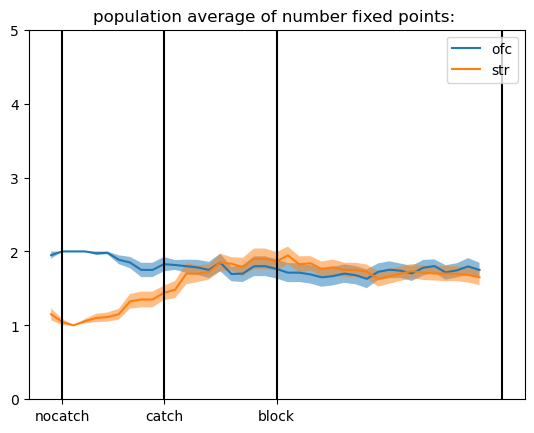

In [37]:
#fig 6d and S7a-c. data for nok_cl

warped = True
plotdim = True

if warped:
    if plotdim:
        nuse_ofc = dims_all_warped_shp  
        nuse_str = dims_all_warped_shp_str
        plttype = 'dim'
    else:
        nuse_ofc = npts_all_warped_shp  
        nuse_str = npts_all_warped_shp_str
        plttype = 'npts'
    ev_use = Tmedians_shp
    ev_use_str = Tmedians_shp_str
else:
    if plotdim:
        nuse_ofc = dims_all_shp
        nuse_str = dims_all_shp_str
    else:
        nuse_ofc = npts_all_shp
        nuse_str = npts_all_shp_str
    ev_use = tphase_shp
    ev_use_str = tphase_shp_str
    


#ofc
npts_filt = np.nanmean(np.array(nuse_ofc),0)
numrnns = np.sum(~np.isnan(nuse_ofc),axis=0)
npts_std = np.nanstd(np.array(nuse_ofc),0)/np.sqrt(numrnns)

#str
npts_filt_str = np.nanmean(np.array(nuse_str),0)
numrnns_str = np.sum(~np.isnan(nuse_str),axis=0)
npts_std_str = np.nanstd(np.array(nuse_str),0)/np.sqrt(numrnns_str)


plt.plot(npts_filt,label='ofc')
plt.fill_between(range(len(npts_filt)),npts_filt-npts_std, npts_filt+npts_std,alpha=0.5 )

plt.plot(npts_filt_str,label='str')
plt.fill_between(range(len(npts_filt_str)),npts_filt_str-npts_std_str, npts_filt_str+npts_std_str,alpha=0.5 )


plt.title('population average of number fixed points: ')
plt.legend()

#change_idx = np.argwhere(np.diff(ev_use)>0)[:,0]

change_idx = ev_use
print(change_idx)
for k in change_idx:
    plt.vlines(k+1,0,5,color='k')

xdict = {0:'simple', 1:'hard', 2:'inf.', 3:'nocatch', 4:'catch', 5:'block'}
labels = ['nocatch','catch','block']
plt.xticks(change_idx[:-1]+1, labels=labels)
if plotdim:
    plt.ylim([0,5])
else:
    plt.ylim([0,7])

#savename = savedir+'keplot_overtraining_pop_'+plttype+'_shp'
#plt.savefig(savename +'.pdf')

plt.show()


[ 0  8 18 28 50]


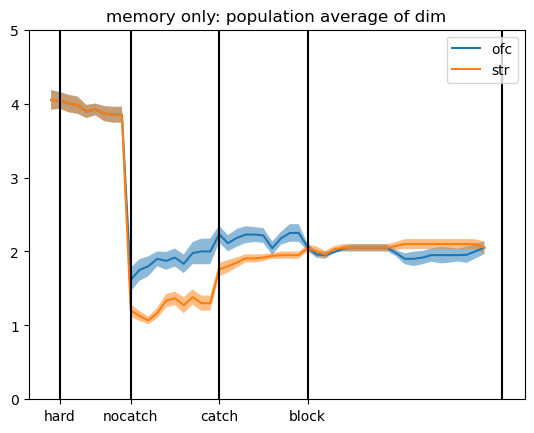

In [38]:
#fig 6d and S7a-c. datafor memory

warped = True
plotdim = True

if warped:
    if plotdim:
        nuse_ofc = dims_all_warped_mem  
        nuse_str = dims_all_warped_mem_str
        plttype = 'dim'
    else:
        nuse_ofc = npts_all_warped_mem  
        nuse_str = npts_all_warped_mem_str
        plttype = 'npts'
    ev_use = Tmedians_mem
    ev_use_str = Tmedians_mem_str
else:
    if plotdim:
        nuse_ofc = dims_all_mem
        nuse_str = dims_all_mem_str
        plttype = 'dim'
    else:
        nuse_ofc = npts_all_mem
        nuse_str = npts_all_mem_str
        plttype = 'npts'
    ev_use = tphase_mem
    ev_use_str = tphase_mem_str
    


#ofc
npts_filt = np.nanmean(np.array(nuse_ofc),0)
numrnns = np.sum(~np.isnan(nuse_ofc),axis=0)
npts_std = np.nanstd(np.array(nuse_ofc),0)/np.sqrt(numrnns)

#str
npts_filt_str = np.nanmean(np.array(nuse_str),0)
numrnns_str = np.sum(~np.isnan(nuse_str),axis=0)
npts_std_str = np.nanstd(np.array(nuse_str),0)/np.sqrt(numrnns_str)


plt.plot(npts_filt,label='ofc')
plt.fill_between(range(len(npts_filt)),npts_filt-npts_std, npts_filt+npts_std,alpha=0.5 )

plt.plot(npts_filt_str,label='str')
plt.fill_between(range(len(npts_filt_str)),npts_filt_str-npts_std_str, npts_filt_str+npts_std_str,alpha=0.5 )


plt.title('memory only: population average of '+plttype)
plt.legend()

#change_idx = np.argwhere(np.diff(ev_use)>0)[:,0]

change_idx = ev_use
print(change_idx)
for k in change_idx:
    plt.vlines(k+1,0,5,color='k')
    
if plotdim:
    plt.ylim([0,5])
else:
    plt.ylim([0,7])

xdict = {0:'simple', 1:'hard', 2:'inf.', 3:'nocatch', 4:'catch', 5:'block'}
labels = ['hard','nocatch','catch','block']
plt.xticks(change_idx[:-1]+1, labels=labels)

#savename = savedir+'keplot_overtraining_pop_'+plttype+'_mem'
#plt.savefig(savename +'.pdf')

plt.show()